In [1]:
!pip install phik
import phik
import numpy as np
import scipy.stats as st
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from phik import resources, report
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 8.5 MB/s eta 0:00:00


In [2]:
df = pd.read_csv("Global YouTube Statistics.csv", encoding='latin-1')

**Описание датасета:**
*  *rank:* Позиция YouTube-канала в зависимости от количества подписчиков
*  *Youtuber:* Имя канала
*  *subscribers:* Количество подписчиков на канал
*  *video views:* Общее количество просмотров по всем видео на канале
*  *category:* Категория или ниша канала
*  *Title:* Название канала на YouTube
* *uploads*: Общее количество загруженных видео на канал
*  *Country*: Страна, в которой создан канал YouTube
*  *Abbreviation*: Аббревиатура страны
*  *channel_type*: Тип канала YouTube (например, индивидуальный, брендовый)
*  *video_views_rank*: Ранжирование канала на основе общего количества просмотров видео
*  *country_rank*: Ранжирование канала на основе количества подписчиков в его стране
*  *channel_type_rank*: Ранжирование канала на основе его типа (индивидуальный или брендовый)
*  *video_views_for_the_last_30_days*: Общее количество просмотров видео за последние 30 дней
*  *lowest_monthly_earnings*: Самый низкий расчетный ежемесячный заработок с канала
*  *highest_monthly_earnings*: Самый высокий расчетный ежемесячный заработок с канала
*  *lowest_yearly_earnings*: Самая низкая расчетная годовая прибыль от канала
*  *highest_yearly_earnings*: Самая высокая расчетная годовая прибыль от канала
*  *subscribers_for_last_30_days*: Количество новых подписчиков за последние 30 дней
*  *created_year*: Год создания YouTube-канала
*  *created_month*: Месяц создания YouTube-канала
*  *created_date*: Точная дата создания YouTube-канала
*  *Gross tertiary education enrollment (%)*: Процентная доля населения, обучающегося в высших учебных заведениях страны
*  *Population*: Общая численность населения страны
*  *Unemployment rate*: Уровень безработицы в стране
*  *Urban_population*: Процентная доля населения, проживающего в городских районах
*  *Latitude*: Координаты широты и расположения страны
*  *Longitude*: Координата долготы и расположения страны

In [ ]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [ ]:
df.isna().sum()

,0
rank,0
Youtuber,0
subscribers,0
video views,0
category,46
Title,0
uploads,0
Country,122
Abbreviation,122
channel_type,30


**Задание 1. EDA**

*  Проведите разведывательный анализ данных (EDA).

*  Задайте не менее 6 вопросов к данным и постарайтесь ответить на них, используя визуализацию.
*  Изобразите матрицу корреляций для нахождения взаимосвязей.

In [3]:
#посмотрим отдельно на некоторые значимые категориальные и непрерывные данные
#категориальные данные
df_category = ["category", "channel_type", "Country", "created_month"]
for column in df_category:
    unique_values = df[column].unique()
    print(f"Уникальные значения в столбце {column}:\n {unique_values}")
    mode_value = df[column].mode()[0]
    print(f"Мода в столбце {column}: {mode_value}")
    value_counts = df[column].value_counts()
    print(f"Частотный анализ в столбце {column}:\n{value_counts}")
    print("\n")


Уникальные значения в столбце category:
 ['Music' 'Film & Animation' 'Entertainment' 'Education' 'Shows' nan
 'People & Blogs' 'Gaming' 'Sports' 'Howto & Style' 'News & Politics'
 'Comedy' 'Trailers' 'Nonprofits & Activism' 'Science & Technology'
 'Movies' 'Pets & Animals' 'Autos & Vehicles' 'Travel & Events']
Мода в столбце category: Entertainment
Частотный анализ в столбце category:
category
Entertainment            241
Music                    202
People & Blogs           132
Gaming                    94
Comedy                    69
Film & Animation          46
Education                 45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: count, dtype: int64


Уникальные значения в столбце channel_type:
 ['Music'

In [4]:
#непрерывные данные
df_num_cols = ["subscribers", "video views", "uploads", "video_views_rank", "country_rank", "channel_type_rank",
               "video_views_for_the_last_30_days", "subscribers_for_last_30_days", "lowest_monthly_earnings",
               "highest_monthly_earnings", "lowest_yearly_earnings", "highest_yearly_earnings",
               "Gross tertiary education enrollment (%)", "Population","Unemployment rate", "Urban_population"]
describe_df = df[df_num_cols].describe()
formatted_describe = describe_df.map(lambda x: f"{x:,.2f}")
print("Базовые статистики для непрерывных данных:\n")
print(formatted_describe)
print("\n")
medians = df[df_num_cols].median()  # Вычисляем медианы
formatted_medians = medians.apply(lambda x: f"{x:,.0f}")  # Применяем форматирование
# Вывод результатов
print("Медиана:\n", formatted_medians)
print("\n")

Базовые статистики для непрерывных данных:

          subscribers         video views     uploads video_views_rank  \
count          995.00              995.00      995.00           994.00   
mean    22,982,412.06   11,039,537,052.04    9,187.13       554,248.90   
std     17,526,105.34   14,110,844,376.83   34,151.35     1,362,782.21   
min     12,300,000.00                0.00        0.00             1.00   
25%     14,500,000.00    4,288,145,410.00      194.50           323.00   
50%     17,700,000.00    7,760,819,588.00      729.00           915.50   
75%     24,600,000.00   13,554,701,853.00    2,667.50         3,584.50   
max    245,000,000.00  228,000,000,000.00  301,308.00     4,057,944.00   

      country_rank channel_type_rank video_views_for_the_last_30_days  \
count       879.00            962.00                           939.00   
mean        386.05            745.72                   175,610,284.79   
std       1,232.24          1,944.39                   416,378,166.21 

interval columns not set, guessing: ['rank', 'subscribers', 'video views', 'uploads', 'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'created_date', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']


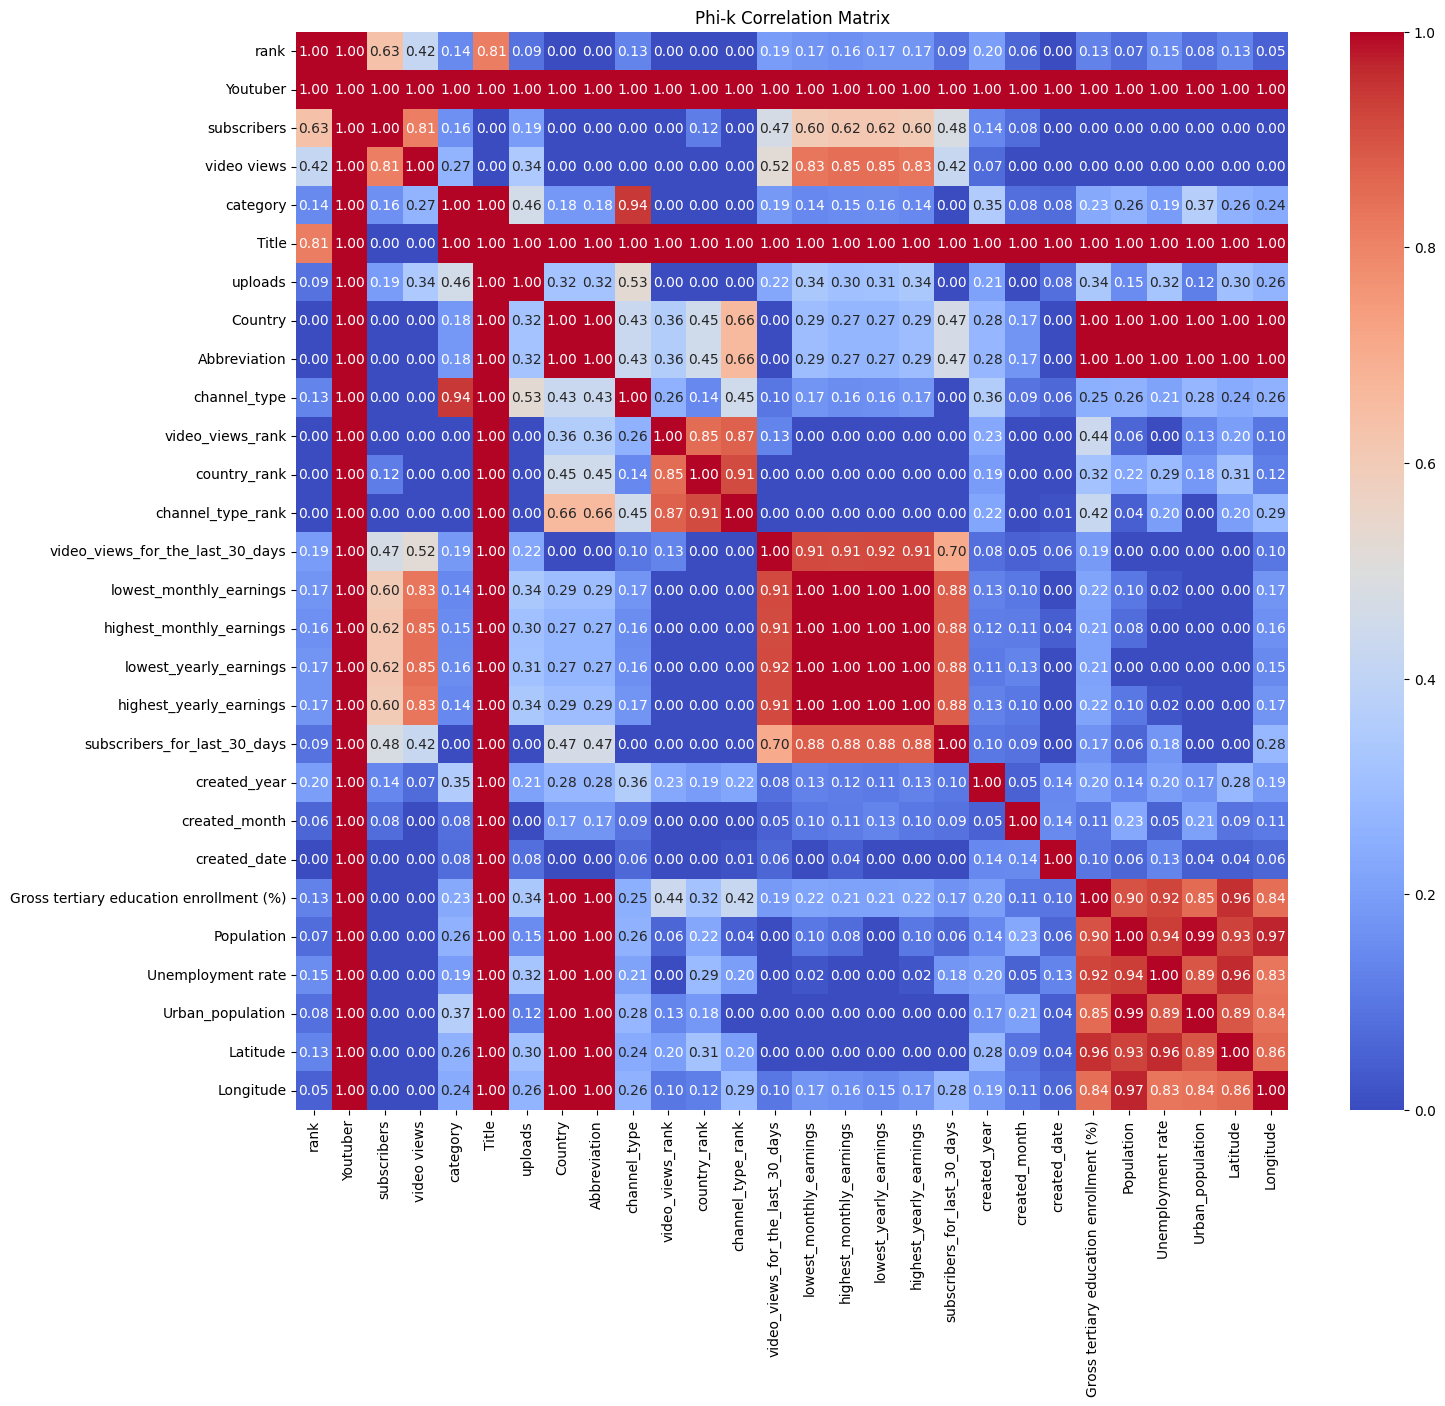

In [ ]:
phik_matrix = df.phik_matrix()
plt.figure(figsize=(16, 14))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Phi-k Correlation Matrix")
plt.show()

**Зададим несколько вопросов к данным и ответим на них используя визуализации**

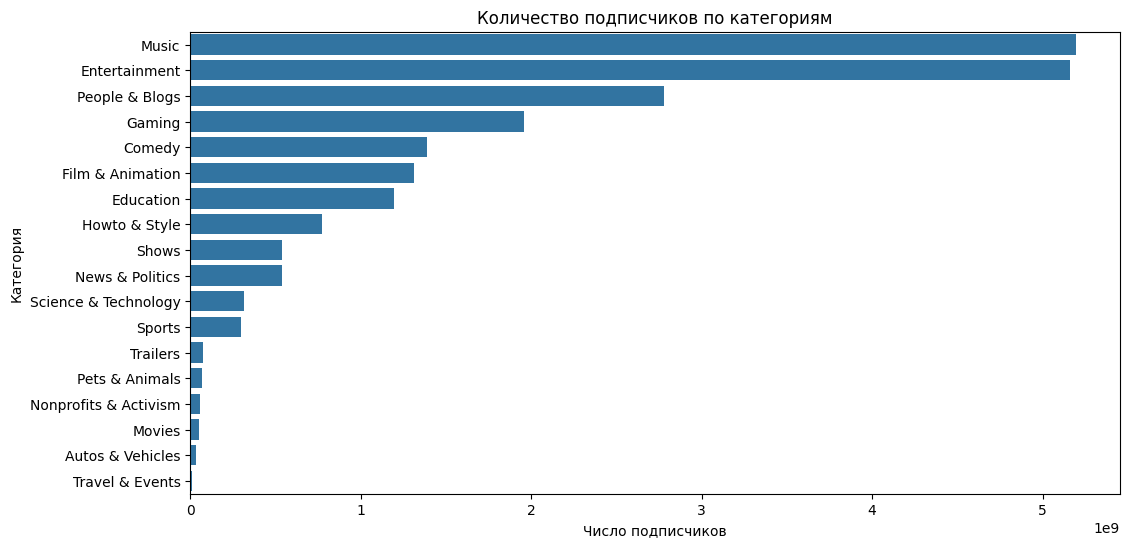

In [ ]:
#Какие категории каналов наиболее популярны по числу подписчиков
category_subs = df.groupby('category')['subscribers'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_subs.values, y=category_subs.index)
plt.title('Количество подписчиков по категориям')
plt.xlabel('Число подписчиков')
plt.ylabel('Категория')
plt.show()

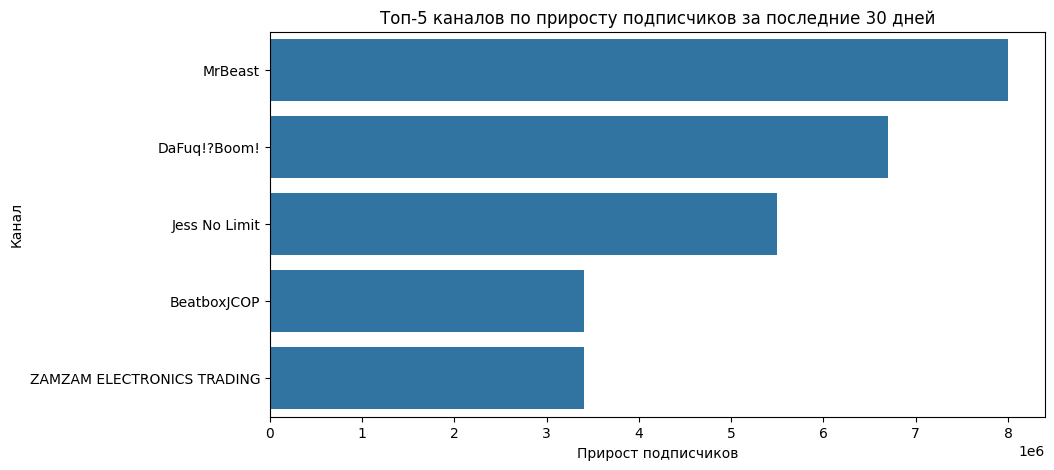

In [ ]:
#Какие каналы показывают наибольший рост по числу подписчиков за последние 30 дней?
top_growth_channels = df[['Youtuber', 'subscribers_for_last_30_days']].sort_values(by='subscribers_for_last_30_days', ascending=False).head(5)

# Построение графика
plt.figure(figsize=(10, 5))
sns.barplot(x='subscribers_for_last_30_days', y='Youtuber', data=top_growth_channels)
plt.title('Топ-5 каналов по приросту подписчиков за последние 30 дней')
plt.xlabel('Прирост подписчиков')
plt.ylabel('Канал')
plt.show()

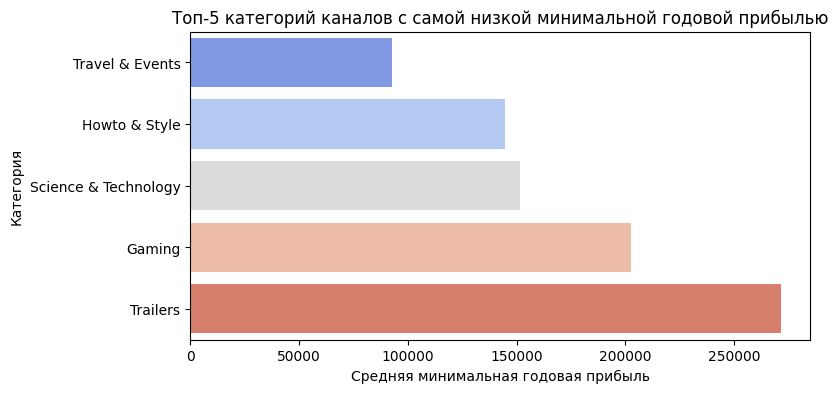

In [ ]:
#Топ-5 категорий каналов с самой низкой прибылью
category_lowest_earnings = df.groupby('category')['lowest_yearly_earnings'].mean().sort_values().head(5)

plt.figure(figsize=(8, 4))
sns.barplot(x=category_lowest_earnings.values, y=category_lowest_earnings.index, hue=category_lowest_earnings.index, palette="coolwarm", legend=False)
plt.title('Топ-5 категорий каналов с самой низкой минимальной годовой прибылью')
plt.xlabel('Средняя минимальная годовая прибыль')
plt.ylabel('Категория')
plt.show()

In [ ]:
# Каково распределение каналов по странам?
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
fig = px.choropleth(country_counts, locations='Country', locationmode='country names', color='Count',
                     title='Количество каналов по странам', color_continuous_scale='blues')
fig.show()

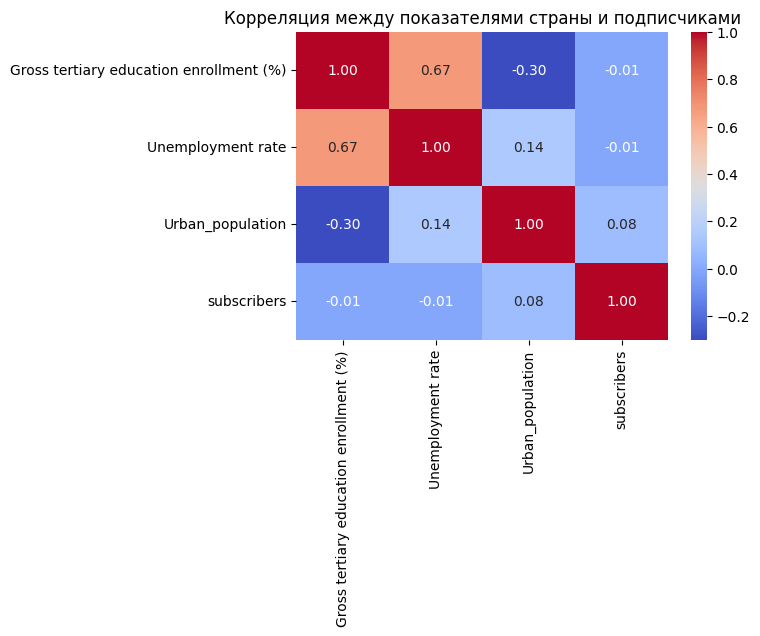

In [ ]:
#Как соотносятся показатели страны (уровень образования, урбанизация, безработица) с популярностью YouTube-каналов?
features = ['Gross tertiary education enrollment (%)', 'Unemployment rate', 'Urban_population', 'subscribers']
corr_matrix = df[features].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между показателями страны и подписчиками')
plt.show()

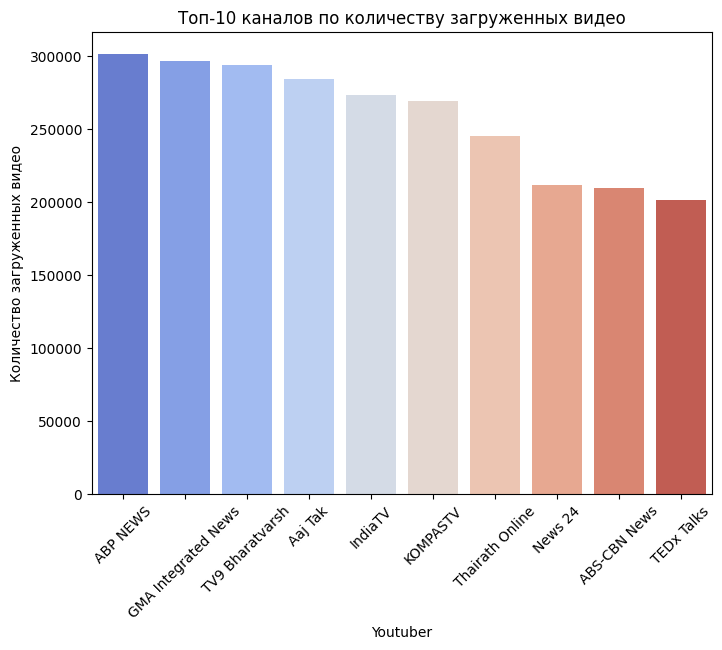

In [ ]:
# Какое среднее количество загрузок видео у топовых каналов?
plt.figure(figsize=(8, 6))
top_uploads = df.nlargest(10, 'uploads')
sns.barplot(x='Youtuber', y='uploads', data=top_uploads, hue='Youtuber', dodge=False, legend=False, palette='coolwarm')
plt.title('Топ-10 каналов по количеству загруженных видео')
plt.xticks(rotation=45)
plt.ylabel('Количество загруженных видео')
plt.show()

**Классификация**
*  Определите две самые популярные категории канала и отфильтруйте по ним набор данных.
*  В качестве признаков используйте следующие столбцы: [‘video views’, ‘subscribers’, ‘uploads’]
*  Снова отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
*  Для целевой переменной используйте столбец'category'. Значения по нему закодируйте с помощью LabelEncoder.
*  Разделите выборку на тестовую и тренировочную, укажите random_state=13.`
*  Постройте модель логистической регрессии.
*  Рассчитайте точность модели на тестовой выборке.
*  Изменится ли точность модели, если в качестве признаков выбрать другие столбцы?

In [5]:
#Определите две самые популярные категории канала и отфильтруйте по ним набор данных.
#В качестве признаков используйте следующие столбцы: [‘video views’, ‘subscribers’, ‘uploads’]
popular_categories = df.groupby('category')['subscribers'].sum().sort_values(ascending=False).head(2).index.tolist()
top_two_data = df[df['category'].isin(popular_categories)][['video views', 'subscribers', 'uploads', 'category']]
print(f"Две самые популярные категории: {popular_categories}")
print(top_two_data.head())

Две самые популярные категории: ['Music', 'Entertainment']
     video views  subscribers  uploads       category
0   2.280000e+11    245000000    20082          Music
2   2.836884e+10    166000000      741  Entertainment
9   7.718017e+10     98900000      574  Entertainment
10  5.785629e+10     96700000     8548          Music
17  2.082699e+10     75600000     2281          Music


In [6]:
#Снова отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
top_two_data = top_two_data[top_two_data['video views'] > 0]
print(top_two_data.head())

     video views  subscribers  uploads       category
0   2.280000e+11    245000000    20082          Music
2   2.836884e+10    166000000      741  Entertainment
9   7.718017e+10     98900000      574  Entertainment
10  5.785629e+10     96700000     8548          Music
17  2.082699e+10     75600000     2281          Music


In [7]:
#Для целевой переменной используйте столбец'category'. Значения по нему закодируйте с помощью LabelEncoder.
label_encoder = LabelEncoder()
top_two_data['category_encoded'] = label_encoder.fit_transform(top_two_data['category'])
print(top_two_data[['category', 'category_encoded']].drop_duplicates())

        category  category_encoded
0          Music                 1
2  Entertainment                 0


In [57]:
#Разделите выборку на тестовую и тренировочную, укажите random_state=13.`
from sklearn.model_selection import train_test_split
X = top_two_data[['video views', 'subscribers', 'uploads']]
y = top_two_data['category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [58]:
#Постройте модель логистической регрессии.
#Рассчитайте точность модели на тестовой выборке.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=13)
model.fit(X_train, y_train)

LogisticRegression(random_state=13)

In [59]:
model.fit(X_train, y_train)

LogisticRegression(random_state=13)

In [60]:
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на тестовой выборке: {accuracy:.2f}")

Точность модели на тестовой выборке: 0.64


In [78]:
#Изменится ли точность модели, если в качестве признаков выбрать другие столбцы?
X_alt = top_two_data[['subscribers', 'uploads']]  # Альтернативный набор столбцов
y = top_two_data['category_encoded']

In [79]:
X_alt_train, X_alt_test, y_train, y_test = train_test_split(X_alt, y, test_size=0.2, random_state=13)

In [80]:
model_alt = LogisticRegression(random_state=13)
model_alt.fit(X_alt_train, y_train)

LogisticRegression(random_state=13)

In [81]:
y_pred_alt = model_alt.predict(X_alt_test)


In [82]:
accuracy_alt = accuracy_score(y_test, y_pred_alt)
print(f"Точность модели на тестовой выборке (альтернативные признаки): {accuracy_alt:.2f}")

Точность модели на тестовой выборке (альтернативные признаки): 0.52


In [ ]:
#Точность модели на альтернативном наборе данных снизилась